## This notebook is used to make figures for theory illustration

In [3]:
import sys
import numpy as np
import pandas as pd
from scipy.special import erf
sys.path.append('../')
from Demonstration.demonstration_utils import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch, ArrowStyle
plt.rc('font', family='Arial', size=9)
plt.rcParams['mathtext.fontset'] = 'stix' # dejavuserif

path_raw = '../Data/RawData/'
path_processed = '../Data/ProcessedData/'
path_input = '../Data/InputData/'
path_output = '../Data/OutputData/'
fig_path = r'C:/SURFdrive/PhD progress/PhDResearch/4_Conflict/AMAR/Figures/'

In [4]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)
    
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

### PET example

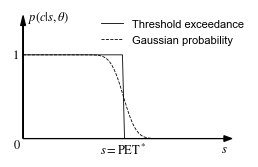

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(3, 1.8))
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

s = np.linspace(0, 8, 100)
p1 = np.ones(100)
p1[s>4] = 0
p2 = 1/2-1/2*erf((s-4)/0.4/np.sqrt(2))

ax.plot(s, p1, c='k', ls='-', lw=1, label='Threshold exceedance')
ax.plot(s, p2, c='k', ls='--', lw=1, label='Gaussian probability')
ax.text(4, -0.13, '$s=\\text{PET}^*$', ha='center', va='center')
ax.text(8, -0.13, '$s$', ha='center', va='center')
ax.text(0.2, 1.45, '$p(c|s,\\theta)$', ha='left', va='center')
ax.text(-0.16, 1, '$1$', ha='right', va='center')
ax.text(-0.1, -0.15, '$0$', ha='right', va='bottom')
ax.legend(loc='upper right', fontsize=8, frameon=False, bbox_to_anchor=(1.05, 1.))
ax.arrow(0, 0, 8, 0, head_width=0.07, head_length=0.32, color='k', lw=0.8)
ax.arrow(0, 0, 0, 1.35, head_width=0.2, head_length=0.12, color='k', lw=0.8)

In [5]:
fig.savefig(fig_path + 'pet_example.pdf', dpi=600, bbox_inches='tight')
# fig.savefig(fig_path + 'pet_example.svg', dpi=600, bbox_inches='tight')

### TTC example

(0.0, 1.0)

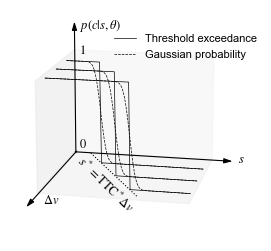

In [8]:
fig = plt.figure(figsize=(4.5, 3))
ax = fig.add_subplot(111, projection='3d')
for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    axis.set_ticks_position('none')
for side in ax.spines:
    ax.spines[side].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

s = np.linspace(0, 12, 100)
for delta_v in [1, 2, 3]:
    threshold = 1 + delta_v * 2
    p1 = np.ones(100)
    p1[s>threshold] = 0
    p2 = 1/2-1/2*erf((s-threshold)/0.4/np.sqrt(2))
    ax.plot(delta_v*np.ones(100), s, p1, c='k', ls='-', lw=0.5, label='Threshold exceedance')
    ax.plot(delta_v*np.ones(100), s, p2, c='k', ls='--', lw=0.5, label='Gaussian probability')

ax.plot([0.2,3.5],[1.4,8],[0,0], c='k', ls=':', lw=0.8)
ax.text(1.8, 4, -0.12, '$s^*=\\text{TTC}^*\\Delta v$', (1,2,0), ha='center', va='center')
ax.arrow3D(-0.13,-0.6,-0.035, 
           0,14.9,0, lw=0.8, color='k',
           arrowstyle=ArrowStyle.CurveFilledB(head_length=5, head_width=1.5))
ax.arrow3D(-0.1,0,0, 
           5,0,0, lw=0.8, color='k',
           arrowstyle=ArrowStyle.CurveFilledB(head_length=5, head_width=1.5))
ax.arrow3D(-0.1,-0.25,-0.07, 
           0,0,1.4, lw=0.8, color='k',
           arrowstyle=ArrowStyle.CurveFilledB(head_length=5, head_width=1.5))

ax.text(-0.5, 0.1, 0, '$0$', ha='center', va='center')
ax.text(-0.5, 0.1, 0.98, '$1$', ha='center', va='center')
ax.text(0, 14.9, 0, '$s$', ha='center', va='center')
ax.text(4.2, 1.5, 0, '$\\Delta v$', ha='center', va='center')
ax.text(-0.2, 0.15, 1.25, '$p(c|s,\\theta)$', ha='left', va='center')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], bbox_to_anchor=proj3d.proj_transform(3.5,23,0.95, ax.get_proj())[:2], bbox_transform=ax.transData,
          loc='upper right', fontsize=8, frameon=False)

ax.view_init(elev=15, azim=372)
ax.set_xlim(0, 3.5)
ax.set_ylim(0, 12)
ax.set_zlim(0, 1.)

In [9]:
fig.savefig(fig_path + 'ttc_example.pdf', dpi=600, bbox_inches='tight')
# fig.savefig(fig_path + 'ttc_example.svg', dpi=600, bbox_inches='tight')

Text(0.5, 0, '$p$')

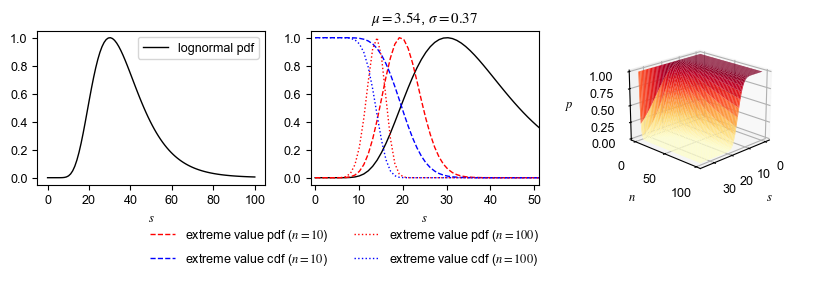

In [47]:
mu = 3.54
sigma = 0.37

x = np.linspace(1e-6,100,100)
p = lognormal_pdf(x, mu, sigma)

fig, axes = plt.subplots(1,3,figsize=(10, 2))
axes[1].set_title('$\\mu=3.54$, $\\sigma=0.37$')
axes[0].plot(x, p, c='k', lw=1, label='lognormal pdf')
axes[0].set_xlabel('$s$')
axes[0].legend()
axes[1].plot(x, p, c='k', lw=1)
axes[1].plot(x, extreme_pdf(x, mu, sigma, 10), 'r--', lw=1, label='extreme value pdf ($n=10$)')
axes[1].plot(x, extreme_cdf(x, mu, sigma, 10), 'b--', lw=1, label='extreme value cdf ($n=10$)')
axes[1].plot(x, extreme_pdf(x, mu, sigma, 100), 'r:', lw=1, label='extreme value pdf ($n=100$)')
axes[1].plot(x, extreme_cdf(x, mu, sigma, 100), 'b:', lw=1, label='extreme value cdf ($n=100$)')
axes[1].set_xlabel('$s$')
axes[1].set_xlim(-1,51)
axes[1].legend(bbox_to_anchor=(1.05, -0.2), ncol=2, frameon=False)

for axis in [axes[2].xaxis, axes[2].yaxis]:
    axis.set_ticks_position('none')
for side in axes[2].spines:
    axes[2].spines[side].set_visible(False)
axes[2].set_xticks([])
axes[2].set_yticks([])

axes[2] = fig.add_subplot(133, projection='3d')
n_list = np.arange(0,100,1).astype(float)
s_list = np.linspace(1e-6, 35, 100)
nn, ss = np.meshgrid(n_list, s_list)
pp = extreme_cdf(ss, mu, sigma, nn)
angle = 45

axes[2].plot_surface(ss, nn, pp, cmap='YlOrRd')
axes[2].view_init(20, angle)
axes[2].set_xlabel('$s$')
axes[2].set_ylabel('$n$')
axes[2].set_zlabel('$p$')

In [48]:
fig_path = r'C:/SURFdrive/PhD progress/PhDResearch/4_Conflict/ICTCT2024/VisualExample/'
fig.savefig(fig_path + 'lognormal_example.png', dpi=600, bbox_inches='tight')